Projeto de predição de Hepatite c

Equipe: Daniel Lemos
        Rafael Targino
        
Data_Set: https://archive.ics.uci.edu/ml/machine-learning-databases/00503/HCV-Egy-Data.zip


Passos:
Ler os dados e normalizá-los cross-validation 10 folds
Utilizar os seguintes algoritimos:
1- KNN variando o K(1,3,5,10)
2- Naive-Bayes
3- Arvore de Decisão (Random Forrest) variando o numero de florestas
4- RLScore(variando o numero de kernels)

In [106]:
!pip install rlscore
import numpy as np
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as pl
%matplotlib inline

In [0]:
df = pd.read_csv("https://drive.google.com/uc?authuser=0&id=1S2HnHU5zoI7ERYhVd8naSaUMt0eJZW3L&export=download")
columns = df.columns
from sklearn import preprocessing



In [0]:
from sklearn import preprocessing
repcolumns = list()
for index, column in enumerate(columns):
  column = column.replace(" ","")
  repcolumns.append(column)
x = df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dfnorm = pd.DataFrame(x_scaled, columns = repcolumns)



692
693
345
345


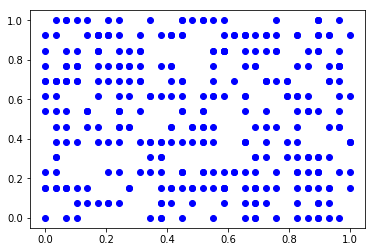

In [108]:

kf = KFold(n_splits = 2, shuffle = True, random_state = 2)
result = next(kf.split(df))
print (len(result[0]))
print(len(result[1]))

train = dfnorm.iloc[result[0]]
tamanho = len(train)
test = dfnorm.iloc[result[1]]
X_train = train[0:int(tamanho/2)-1]
Y_train = train[int(tamanho/2):len(train)-1]
X_test =  test[0:int(len(test)/2)]
Y_test =  test[int(len(test)/2):len(test)-1]
print(len(X_train))
print(len(Y_train))
pl.plot(X_train['Age'],X_train['BMI'],'bo')





leave-one-out error 0.144001
test error 0.140287


/usr/local/lib/python3.6/dist-packages/rlscore/utilities/array_tools.py:43: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if not np.issubdtype(A.dtype, int) and not np.issubdtype(A.dtype, float):
/usr/local/lib/python3.6/dist-packages/rlscore/utilities/array_tools.py:43: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(A.dtype, int) and not np.issubdtype(A.dtype, float):


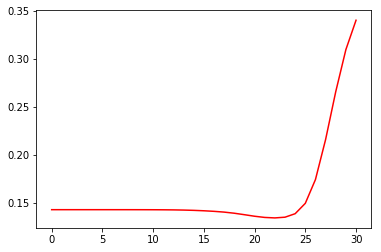

In [109]:
from rlscore.learner import RLS
from rlscore.measure import sqerror
from rlscore.learner import LeaveOneOutRLS

regparams = [2.**i for i in range(-15, 16)]
learner = RLS(X_train, Y_train, kernel="PolynomialKernel", regparam = 100, gamma=1.0, coef0=1.0, degree=2)
#Leave-one-out cross-validation predictions, this is fast due to
#computational short-cut
P_loo = learner.leave_one_out()
#Test set predictions
P_test = learner.predict(X_test)
print("leave-one-out error %f" %sqerror(Y_train, P_loo))
print("test error %f" %sqerror(Y_test, P_test))
#Sanity check, can we do better than predicting mean of training labels?


pl.plot(loo_errors,'r')

In [110]:
  regparams = [2.**i for i in range(-15, 16)]
  gammas = regparams
  best_regparam = None
  best_gamma = None
  best_error = float("inf")
  best_learner = None
  for gamma in gammas:
      #New RLS is initialized for each kernel parameter
      learner = LeaveOneOutRLS(X_train, Y_train, kernel="GaussianKernel", gamma=gamma, regparams=regparams)
      e = np.min(learner.cv_performances)
      if e < best_error:
          best_error = e
          best_regparam = learner.regparam
          best_gamma = gamma
          best_learner = learner
P_test = best_learner.predict(X_test)
print("best parameters gamma %f regparam %f" %(best_gamma, best_regparam))
print("best leave-one-out error %f" %best_error)
print("test error %f" %sqerror(Y_test, P_test))

/usr/local/lib/python3.6/dist-packages/rlscore/utilities/array_tools.py:43: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if not np.issubdtype(A.dtype, int) and not np.issubdtype(A.dtype, float):
/usr/local/lib/python3.6/dist-packages/rlscore/utilities/array_tools.py:43: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(A.dtype, int) and not np.issubdtype(A.dtype, float):


best parameters gamma 0.000031 regparam 1.000000
best leave-one-out error 0.130081
test error 0.129510
